In [32]:
from src import MakeDataset, NeuralNetwork, Satellite, UNet

**Initialise satellites**

In [34]:
techno_sat = Satellite.Satellite(480, 640, 3, 'TechnoSat')
sentinel_2 = Satellite.Satellite(1022, 1022, 3, 'Sentinel 2')
landsat_8 = Satellite.Satellite(992, 992, 2, 'Landsat 8')
landsat_8_input = Satellite.Satellite(1000, 1000, 2, 'Landsat 8')

**Create dataset**

In [36]:
dataset = MakeDataset.Dataset(landsat_8)
dataset.load_data('data/L8_SPARCS', landsat_8_input, resize=True)

**Patch dataset**

In [260]:
dataset.patch_dataset(pixel_shift=160)

**Expand dataset**

In [ ]:
dataset.transform_expand_dataset()
dataset.rotate_dataset()

**Initialise neural network**

In [37]:
network = NeuralNetwork.NeuralNetwork(dataset)

**Load (pre-trained) model**

In [38]:
network.load_model('models/cloud_model_2021-12-10_1.hdf5', 'histories/cloud_hist_2021-12-10_1.npy')

**Plot history**

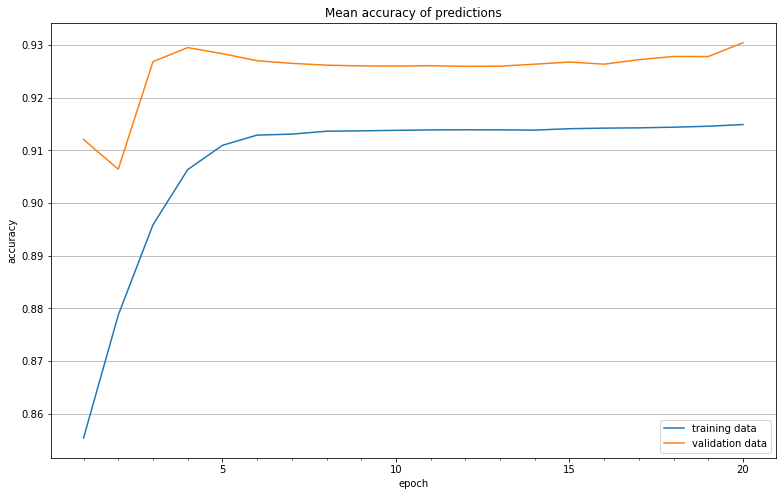

In [212]:
network.draw_history()

**Predict data**

In [39]:
network.predict(dataset.images)

**Show prediction of desired image**

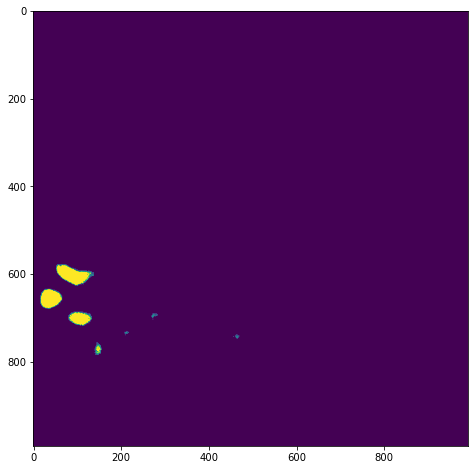

In [44]:
import matplotlib.pyplot as plt

plt.imshow(network.prediction_masks[1])

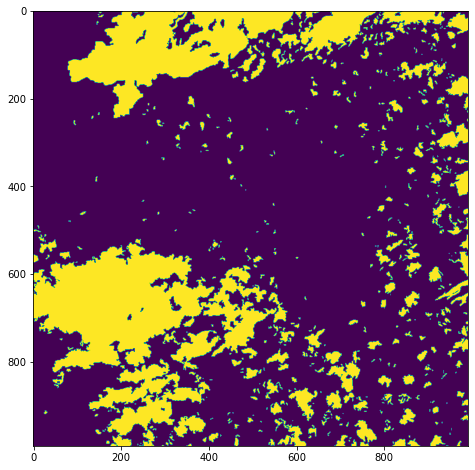

In [45]:
plt.imshow(dataset.masks[1])

**Evaluate prediction**

In [197]:
network.evaluate_prediction(dataset.masks[:100])

In [198]:
network.F1

0.09963698585373679

In [199]:
network.confusion_matrix

array([[0.05921907, 0.03877557],
       [0.94078093, 0.96122443]])

In [200]:
network.precision

0.3138324151146775

In [201]:
network.accuracy_vec[1]

AttributeError: 'NeuralNetwork' object has no attribute 'accuracy_vec'